<div style="font-size: 30px">
Business Understanding

- In this project we will try to find optimal insight for the Dutch government into traffic accidents per region. Specifically, this report will be targeted what kind of accidents happen in which region. The government wants to warn people through advertisement. 
- Since there are lots of regions in the Netherlands we will try to detect the locations where most fatal accidents happen. We are also particularly interested in areas with lower traffic accident rates to save advertisement costs on. 
- We will use our data science powers to generate the most dangerous areas on this criteria. Advantages of investing in advertisement in an area will then be clearly expressed so that best possible final location can be chosen by the government.

<div style="font-size: 30px">
Data Understanding

As we need to explore, segment, and cluster the regions of the Netherlands. The coordinates of accidents and the kind of accidents are key in this project. I retrieved a data set of traffic accidents that happened in 2004. This data set contains information about:

- Coordinates of accidents
<p>
- Accidents IDs
<p>    
- Kind of accidents
<p>   
- Cause of accidents

Following data sources will be used to get the required information:
* centers of areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of accidents and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinates of regions will be obtained using **Google Maps API geocoding**

<div style="font-size: 30px">
Data Exploration

In [1]:
import pandas as pd
import numpy as np

The file was hosted by the Dutch government in 2004

In [2]:
filename = "https://ckan.dataplatform.nl/dataset/c296d091-0138-40ac-b398-b7202761bf64/resource/297ed4e2-cf72-44e3-bc37-4b8bd1db6b2d/download/ongevallen-2004.csv"

Create a data frame 

In [3]:
df = pd.read_csv(filename)

/Users/amac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,28,32,37,43,45,46,57,63,66,83,84,85,86,87,88,89,90,91,92,93,94,101,107,108,109,110,111,113,114) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Check what the data set looks like

In [4]:
df.head()

,Longitude,Latitude,OngevalID,Communicatie_Ref,ProcesverbaalOpgem,Afloop3,AantalPartijen,Aard,GekoppledNiveau,Wegsituatie,...,EndKM,WegbeheerderSortRijk,WegbeheerderSortProvincie,WegbeheerderSortGemeente,WegbeheerderSortWaterSchap,WegbeheerderSortOverig,AantalWegvakkenMetJunctie,ActueellWegvakkenMetJunctie,SamengesteldLocatieType_Junctie,SamengesteldLocatieNummer_Junctie
0,3.364700,51.313763,120041872038,04-176360,NaN,Uitsluitend materiele schade,2,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.310351,51.527046,120041856048,04-177712,NaN,Letsel,1,Eenzijdig,Ongeval exact gekoppeld aan BN,Bocht,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.048437,51.499148,120041879850,04-186040,NaN,Uitsluitend materiele schade,2,Kop/staart,Ongeval exact gekoppeld aan BN,Rechte weg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.364700,51.313763,120041871785,04-178227,NaN,Uitsluitend materiele schade,2,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.371984,51.313218,120041921852,04-209663,NaN,Uitsluitend materiele schade,2,Vast voorwerp,Ongeval exact gekoppeld aan BN,Rechte weg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Longitude', 'Latitude', 'OngevalID', 'Communicatie_Ref',
       'ProcesverbaalOpgem', 'Afloop3', 'AantalPartijen', 'Aard',
       'GekoppledNiveau', 'Wegsituatie',
       ...
       'EndKM', 'WegbeheerderSortRijk', 'WegbeheerderSortProvincie',
       'WegbeheerderSortGemeente', 'WegbeheerderSortWaterSchap',
       'WegbeheerderSortOverig', 'AantalWegvakkenMetJunctie',
       'ActueellWegvakkenMetJunctie', 'SamengesteldLocatieType_Junctie',
       'SamengesteldLocatieNummer_Junctie'],
      dtype='object', length=116)

In [6]:
df_accidents = df.filter(['Longitude', 'Latitude', 'GemeenteNaam', 'OngevalID', 'Afloop3', 'Aard', 'GekoppledNiveau', 'Wegsituatie'])
df_accidents.shape

(146813, 8)

In [7]:
df_accidents.dtypes

Longitude          float64
Latitude           float64
GemeenteNaam        object
OngevalID            int64
Afloop3             object
Aard                object
GekoppledNiveau     object
Wegsituatie         object
dtype: object

In [8]:
df_accidents.replace("?", np.nan, inplace = True)
df_accidents.head(5)

,Longitude,Latitude,GemeenteNaam,OngevalID,Afloop3,Aard,GekoppledNiveau,Wegsituatie
0,3.364700,51.313763,Sluis Z,120041872038,Uitsluitend materiele schade,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg
1,4.310351,51.527046,Bergen op Zoom,120041856048,Letsel,Eenzijdig,Ongeval exact gekoppeld aan BN,Bocht
2,4.048437,51.499148,Reimerswaal,120041879850,Uitsluitend materiele schade,Kop/staart,Ongeval exact gekoppeld aan BN,Rechte weg
3,3.364700,51.313763,Sluis Z,120041871785,Uitsluitend materiele schade,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg
4,3.371984,51.313218,Sluis Z,120041921852,Uitsluitend materiele schade,Vast voorwerp,Ongeval exact gekoppeld aan BN,Rechte weg


In [9]:
missing_data = df_accidents.isnull()
missing_data.head(100)

,Longitude,Latitude,GemeenteNaam,OngevalID,Afloop3,Aard,GekoppledNiveau,Wegsituatie
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


Count the missing values

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Longitude
False    146813
Name: Longitude, dtype: int64

Latitude
False    146813
Name: Latitude, dtype: int64

GemeenteNaam
False    146813
Name: GemeenteNaam, dtype: int64

OngevalID
False    146813
Name: OngevalID, dtype: int64

Afloop3
False    146813
Name: Afloop3, dtype: int64

Aard
False    146813
Name: Aard, dtype: int64

GekoppledNiveau
False    146813
Name: GekoppledNiveau, dtype: int64

Wegsituatie
False    145867
True        946
Name: Wegsituatie, dtype: int64



Only the situation of the road has some missing data. Since, we do not need this specific data, we can remove this column. 


In [11]:
df_complete = df_accidents.filter(['Longitude', 'Latitude', 'GemeenteNaam','OngevalID', 'Afloop3', 'Aard', 'GekoppledNiveau', 'Wegsituatie'])
df_complete.shape

(146813, 8)

Let's count all the possible conditions indicated by the 'Afloop3' variable 

In [12]:
List_Of_Categories_In_Column = list(df_complete['Afloop3'].value_counts().index)
List_Of_Categories_In_Column

['Uitsluitend materiele schade', 'Letsel', 'Dodelijk']

Filter all the deadly accidents out of the data set

In [13]:
df_deadly = df_complete[df_complete['Afloop3']=='Dodelijk']
df_deadly

,Longitude,Latitude,GemeenteNaam,OngevalID,Afloop3,Aard,GekoppledNiveau,Wegsituatie
96,3.519595,51.404835,Sluis Z,120041952712,Dodelijk,Eenzijdig,Ongeval exact gekoppeld aan BN,Bocht
292,3.593481,51.580030,Veere,120041855111,Dodelijk,Eenzijdig,Ongeval exact gekoppeld aan BN,Rechte weg
293,3.604188,51.336058,Sluis Z,120041856794,Dodelijk,Eenzijdig,Ongeval exact gekoppeld aan BN,Bocht
394,3.637354,51.306435,Sluis Z,20041211003,Dodelijk,Vast voorwerp,Ongeval exact gekoppeld aan BN,Rechte weg
446,3.658242,51.342008,Terneuzen,120041901290,Dodelijk,Voetganger,Ongeval exact gekoppeld aan BN,Rechte weg
...,...,...,...,...,...,...,...,...
145337,4.254544,51.689984,Oostflakkee,20040141013,Dodelijk,Flank,Ongeval exact gekoppeld aan BN,Kruispunt 4 takken
145769,3.879332,51.710206,Schouwen-Duiveland,120041853806,Dodelijk,Eenzijdig,Ongeval exact gekoppeld aan BN,Kruispunt 3 takken
146547,4.031306,51.347703,Hulst,120041854158,Dodelijk,Frontaal,Ongeval exact gekoppeld aan BN,Kruispunt 4 takken
146725,3.591821,51.328533,Sluis Z,120041952714,Dodelijk,Kop/staart,Ongeval exact gekoppeld aan BN,Kruispunt 4 takken


Let's visualize the deadly accidents per region

In [14]:
import folium

# create map and display it
netherlands_map = folium.Map(location=[52.37, 4.90], zoom_start=12)

# display the map of the Netherlands
netherlands_map

In [15]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_deadly.Latitude, df_deadly.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
netherlands_map.add_child(incidents)

Convert the categorical column to a numerical column

In [16]:
dummy_variable_1 = pd.get_dummies(df_deadly["Afloop3"])
dummy_variable_1.head()

,Dodelijk
96,1
292,1
293,1
394,1
446,1


In [17]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df_deadly, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Afloop3", axis = 1, inplace=True)

In [18]:
df.shape

(747, 8)

In [19]:
grouped = df.groupby('GemeenteNaam')
grouped

In [20]:
grouper = grouped['Dodelijk'].sum().to_frame(name = 'Dodelijk').reset_index()
grouper

,GemeenteNaam,Dodelijk
0,Aa en Hunze,2
1,Aalsmeer,1
2,Achtkarspelen,3
3,Albrandswaard,1
4,Alkmaar,4
...,...,...
296,Zundert,1
297,Zutphen,4
298,Zwartewaterland,3
299,Zwijndrecht,1


Get the region json file

In [21]:
world_geo = r'gemeenten.json'

In [22]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
netherlands_map.choropleth(
    geo_data=world_geo,
    data=grouper,
    columns=['GemeenteNaam', 'Dodelijk'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Deadly accidents'
)

# display map
netherlands_map

Most deadly accidents seem to happen not in the capital, but in Rotterdam. 

<div style="font-size: 30px">
Modeling

Let's create a good classification model to predict accidents in the future. What would be the best classification technique? 

Use one-hot coding to create a train and test set 

In [23]:
df_complete.head()

,Longitude,Latitude,GemeenteNaam,OngevalID,Afloop3,Aard,GekoppledNiveau,Wegsituatie
0,3.364700,51.313763,Sluis Z,120041872038,Uitsluitend materiele schade,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg
1,4.310351,51.527046,Bergen op Zoom,120041856048,Letsel,Eenzijdig,Ongeval exact gekoppeld aan BN,Bocht
2,4.048437,51.499148,Reimerswaal,120041879850,Uitsluitend materiele schade,Kop/staart,Ongeval exact gekoppeld aan BN,Rechte weg
3,3.364700,51.313763,Sluis Z,120041871785,Uitsluitend materiele schade,Vast voorwerp,Ongeval gekoppeld op straat niveau,Rechte weg
4,3.371984,51.313218,Sluis Z,120041921852,Uitsluitend materiele schade,Vast voorwerp,Ongeval exact gekoppeld aan BN,Rechte weg


In [24]:
Feature = df_complete[['Longitude', 'Latitude', 'GemeenteNaam', 'OngevalID', 'GekoppledNiveau', 'Wegsituatie']]
Feature = pd.concat([Feature,pd.get_dummies(df_complete['Aard'])], axis=1)
Feature.drop(['GemeenteNaam', 'OngevalID', 'GekoppledNiveau', 'Wegsituatie'], axis = 1,inplace=True)
Feature.head()

,Longitude,Latitude,Dier,Eenzijdig,Flank,Frontaal,Geparkeerd voertuig,Kop/staart,Los voorwerp,Onbekend,Vast voorwerp,Voetganger
0,3.364700,51.313763,0,0,0,0,0,0,0,0,1,0
1,4.310351,51.527046,0,1,0,0,0,0,0,0,0,0
2,4.048437,51.499148,0,0,0,0,0,1,0,0,0,0
3,3.364700,51.313763,0,0,0,0,0,0,0,0,1,0
4,3.371984,51.313218,0,0,0,0,0,0,0,0,1,0


In [25]:
X = Feature
X[0:5]

,Longitude,Latitude,Dier,Eenzijdig,Flank,Frontaal,Geparkeerd voertuig,Kop/staart,Los voorwerp,Onbekend,Vast voorwerp,Voetganger
0,3.364700,51.313763,0,0,0,0,0,0,0,0,1,0
1,4.310351,51.527046,0,1,0,0,0,0,0,0,0,0
2,4.048437,51.499148,0,0,0,0,0,1,0,0,0,0
3,3.364700,51.313763,0,0,0,0,0,0,0,0,1,0
4,3.371984,51.313218,0,0,0,0,0,0,0,0,1,0


Create a binary variable for 'Afloop3'

In [26]:
df_complete.replace("Uitsluitend materiele schade", "Niet dodelijk", inplace = True)
df_complete.replace("Letsel", 'Niet dodelijk', inplace=True)
check = list(df_complete['Afloop3'].value_counts().index)
check

['Niet dodelijk', 'Dodelijk']

In [27]:
y = df_complete['Afloop3'].values
y[0:5]

array(['Niet dodelijk', 'Niet dodelijk', 'Niet dodelijk', 'Niet dodelijk',
       'Niet dodelijk'], dtype=object)

In [28]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.56781408, -1.44483563, -0.13674778, -0.28359989, -0.63330449,
        -0.35944468, -0.21930645, -0.57329969, -0.07073923, -0.06765853,
         2.07224116, -0.12274206],
       [-1.38672612, -1.05152052, -0.13674778,  3.52609451, -0.63330449,
        -0.35944468, -0.21930645, -0.57329969, -0.07073923, -0.06765853,
        -0.48256932, -0.12274206],
       [-1.71384767, -1.10296625, -0.13674778, -0.28359989, -0.63330449,
        -0.35944468, -0.21930645,  1.74428841, -0.07073923, -0.06765853,
        -0.48256932, -0.12274206],
       [-2.56781408, -1.44483563, -0.13674778, -0.28359989, -0.63330449,
        -0.35944468, -0.21930645, -0.57329969, -0.07073923, -0.06765853,
         2.07224116, -0.12274206],
       [-2.55871639, -1.44584108, -0.13674778, -0.28359989, -0.63330449,
        -0.35944468, -0.21930645, -0.57329969, -0.07073923, -0.06765853,
         2.07224116, -0.12274206]])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [48]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [49]:
yhatsvm = clf.predict(X_test)
yhatsvm[0:5]

array(['Niet dodelijk', 'Niet dodelijk', 'Niet dodelijk', 'Niet dodelijk',
       'Niet dodelijk'], dtype=object)

/Users/amac/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

     Dodelijk       0.00      0.00      0.00       162
Niet dodelijk       0.99      1.00      1.00     29201

     accuracy                           0.99     29363
    macro avg       0.50      0.50      0.50     29363
 weighted avg       0.99      0.99      0.99     29363

Confusion matrix, without normalization
[[    0   162]
 [    0 29201]]


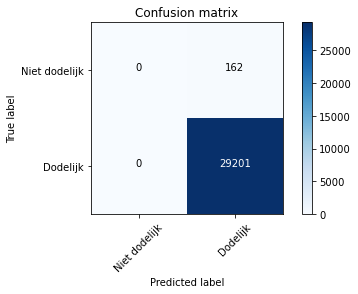

In [50]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatsvm)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df_complete["Afloop3"].unique().tolist(),normalize= False,  title='Confusion matrix')

The SVM trained classifier seems to predict results with an accuracy of 99%

<div style="font-size: 30px">
Evaluation

During this project, we were focused on getting insights into on analysing dangerous regions within the Netherlands. It appears that Rotterdam has the most accidents. The government can use this data to advertise more about the safety in Rotterdam to reduce this amount of accidents. Furthermore, we created a classifier by using a Support Vector Machine. This classifier proved to have an accuracy of 99%. It decides on the basis of the accident cause what the damage (deadly/not deadly) would be.  